In [9]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [10]:
import numpy as np
import pandas as pd

In [11]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [13]:
path = 'resources/hawaii.sqlite'
engine = create_engine(f"sqlite:///{path}")
conn = engine.connect()

In [14]:
# reflect an existing database into a new model

# reflect the tables

In [15]:
# We can view all of the classes that automap found


In [16]:
# Save references to each table


In [17]:
# Create our session (link) from Python to the DB


# Exploratory Climate Analysis

In [64]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

last_12_prcp = pd.read_sql('''SELECT 
                                    date,
                                    prcp
                              FROM 
                                    measurement 
                              WHERE 
                                    date BETWEEN "2017-01-01" AND "2017-12-31" 
                                    AND prcp <> "NaN"''',conn)

last_12_prcp.set_index(['date']).sort_values(['date'])

,prcp
date,
2017-01-01,0.00
2017-01-01,0.29
2017-01-01,0.03
2017-01-01,0.03
2017-01-01,0.00
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.08


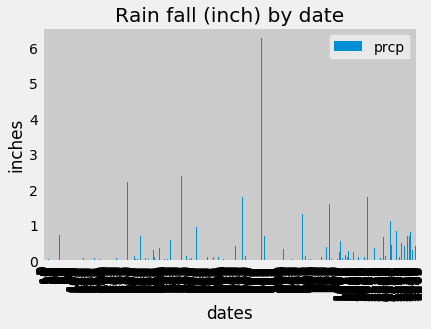

In [65]:
# Use Pandas Plotting with Matplotlib to plot the data
last_12_prcp.plot.bar()

plt.xlabel('dates')
plt.ylabel('inches')
plt.title('Rain fall (inch) by date')

plt.show()

In [39]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_12_prcp.describe()

,prcp
count,1267.000000
mean,0.165927
std,0.453913
min,0.000000
25%,0.000000
50%,0.000000
75%,0.105000
max,6.250000


In [66]:
# Calculate the date 1 year ago from the last data point in the database
last_date = pd.read_sql('''SELECT 
                                max(date) last_date
                           FROM 
                                measurement''',conn)
last_date

,last_date
0,2017-08-23


In [67]:
# Design a query to show how many stations are available in this dataset
stations_count = pd.read_sql('''SELECT
                                    count(distinct station) total_stations
                                FROM 
                                    measurement''',conn)
stations_count

,total_stations
0,9


In [68]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = pd.read_sql('''SELECT
                                        station, 
                                        count(prcp) observations
                                  FROM
                                        measurement
                                  GROUP BY
                                        station
                                  ORDER BY 
                                        observations DESC''',conn)
station_activity

,station,observations
0,USC00519281,2772
1,USC00513117,2696
2,USC00519397,2685
3,USC00519523,2572
4,USC00516128,2484
5,USC00514830,1937
6,USC00511918,1932
7,USC00517948,683
8,USC00518838,342


In [69]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

most_active_station = pd.read_sql(''' SELECT
                                            m.station,
                                            name,
                                            min(tobs) min_temp,
                                            max(tobs) max_temp,
                                            avg(tobs) avg_temp
                                      FROM
                                            measurement m inner join station s
                                            on m.station = s.station
                                      WHERE
                                            m.station = (SELECT 
                                                            station
                                                        FROM(
                                                                SELECT
                                                                    station,
                                                                    max(observations)
                                                                FROM(
                                                                        SELECT 
                                                                            station, 
                                                                            count(*) observations
                                                                        FROM 
                                                                            measurement
                                                                        GROUP BY 
                                                                            station
                                                                    )
                                                                )
                                                            )''',conn)

most_active_station

,station,name,min_temp,max_temp,avg_temp
0,USC00519281,"WAIHEE 837.5, HI US",54.0,85.0,71.663781


In [76]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
max_temp_obs = pd.read_sql('''SELECT
                                    date,
                                    tobs
                               FROM
                                     measurement
                               WHERE 
                                     date BETWEEN '2016-08-23' AND '2017-08-23'
                                     AND station = (
                                                    SELECT 
                                                        station
                                                    FROM(
                                                            SELECT
                                                                station,
                                                                max(temp_obs)
                                                            From(
                                                                    SELECT 
                                                                        station,
                                                                        count(tobs) temp_obs
                                                                    FROM
                                                                        measurement
                                                                    WHERE
                                                                        date BETWEEN '2016-08-23' AND '2017-08-23'
                                                                    GROUP BY
                                                                        station
                                                                )
                                                        )
                                                    )''',conn)

max_temp_obs = max_temp_obs.set_index('date')
max_temp_obs

,tobs
date,
2016-08-23,81.0
2016-08-24,79.0
2016-08-25,80.0
2016-08-26,79.0
2016-08-27,77.0
...,...
2017-08-19,79.0
2017-08-20,81.0
2017-08-21,81.0


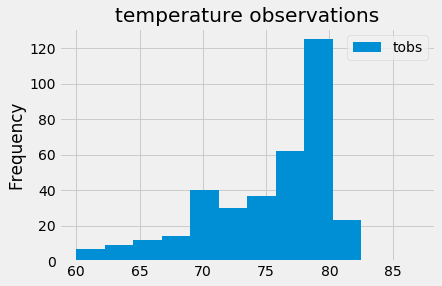

In [78]:
max_temp_obs.plot(kind = 'hist', bins = 12, title = 'temperature observations')
plt.xlabel = 'Temp'

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
